In [1]:
import os 
files = os.listdir()
files

['Model2_transaction_data.csv',
 'pr03.ipynb',
 'reservation_data.csv',
 'WhatsApp Image 2024-10-24 at 5.15.01 PM.jpeg',
 'Readme.md',
 'WhatsApp Image 2024-10-24 at 5.16.08 PM.jpeg',
 'Model 1_overlapping_transaction_data.csv']

In [2]:
model1 = 'Model 1_overlapping_transaction_data.csv'
model2 = 'Model2_transaction_data.csv'
reserv = 'reservation_data.csv'

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
df0 = pd.read_csv(reserv)
df1 = pd.read_csv(model1)
df2 = pd.read_csv(model2)

In [4]:
df0

,ResrvId,ResrvStartTime,ResrvEndTime,ResrvDate,ExpectedTimeMins,ExpectedPower
0,R001,21:17,23:47,10-03-2024,150,44
1,R002,15:18,17:18,10/16/2024,120,36
2,R003,12:49,15:19,10/27/2024,150,44
3,R004,11:27,12:57,10/17/2024,90,27
4,R005,9:46,12:16,10/28/2024,150,44
...,...,...,...,...,...,...
295,R296,19:49,21:49,10/15/2024,120,36
296,R297,8:55,10:55,10/17/2024,120,36
297,R298,2:09,3:09,10/14/2024,60,18
298,R299,8:22,11:22,10/26/2024,180,53


In [5]:
df1['ActualTimeMins'] = df1['ActualTimeMins'].round(2)
df1['ActualPower'] = df1['ActualPower'].round(2)
df1

,CP_ResrvId,CP_TransId,CP_StartTime,CP_EndTime,CP_ChargeDate,ActualTimeMins,ActualPower
0,R001,00T11,21:17,23:47,10-03-2024,150.0,45.00
1,R002,00T21,15:18,17:18,10/16/2024,120.0,36.00
2,R003,00T31,12:49,15:19,10/27/2024,150.0,45.00
3,R004,00T41,11:27,11:37,10/17/2024,10.0,3.00
4,R004,00T42,11:38,12:08,10/17/2024,30.0,9.00
...,...,...,...,...,...,...,...
408,R296,T2962,20:49,21:49,10/15/2024,59.1,17.73
409,R297,T2971,8:55,10:55,10/17/2024,120.0,36.00
410,R298,T2981,2:09,3:09,10/14/2024,60.0,18.00
411,R299,T2991,8:22,11:22,10/26/2024,180.0,54.00


In [6]:
df2['ActualTimeMins'] = df2['ActualTimeMins'].round(2)
df2['ActualPower'] = df2['ActualPower'].round(2)
df2

,CP_ResrvId,CP_TransId,CP_StartTime,CP_EndTime,CP_ChargeDate,ActualTimeMins,ActualPower
0,R001,00T11,21:17,23:47,10-03-2024,150.00,45.00
1,R002,00T21,15:18,17:18,10/16/2024,120.00,36.00
2,R003,00T31,12:49,15:19,10/27/2024,150.00,45.00
3,R004,00T41,11:27,12:57,10/17/2024,90.00,27.00
4,R005,00T51,9:46,12:16,10/28/2024,150.00,45.00
...,...,...,...,...,...,...,...
381,R296,T2963,20:16,21:49,10/15/2024,92.04,27.61
382,R297,T2971,8:55,10:55,10/17/2024,120.00,36.00
383,R298,T2981,2:09,3:09,10/14/2024,15.00,4.50
384,R299,T2991,8:22,11:22,10/26/2024,180.00,54.00


In [7]:
print('df0:',df0.shape)
print('df1:',df1.shape)
print('df2:',df2.shape)


df0: (300, 6)
df1: (413, 7)
df2: (386, 7)


In [8]:
# df0.sort_values(by=['ExpectedTimeMins'], inplace=True)
resrvIds = df0['ResrvId'].to_list()
expectedTimeMins = df0['ExpectedTimeMins'].to_list()
expectedPower = df0['ExpectedPower'].to_list()


In [9]:
model1ActualTimeMins = []
model1ActualPower = []
model2ActualTimeMins = []
model2ActualPower = []

for rid in resrvIds:
    dict1 = df1[df1['CP_ResrvId']==rid].to_dict()
    model1ActualTimeMins.append(sum(dict1['ActualTimeMins'].values()))
    model1ActualPower.append(sum(dict1['ActualPower'].values()))

    dict2 = df2[df2['CP_ResrvId']==rid].to_dict()
    model2ActualTimeMins.append(sum(dict2['ActualTimeMins'].values()))
    model2ActualPower.append(sum(dict2['ActualPower'].values()))
    
    

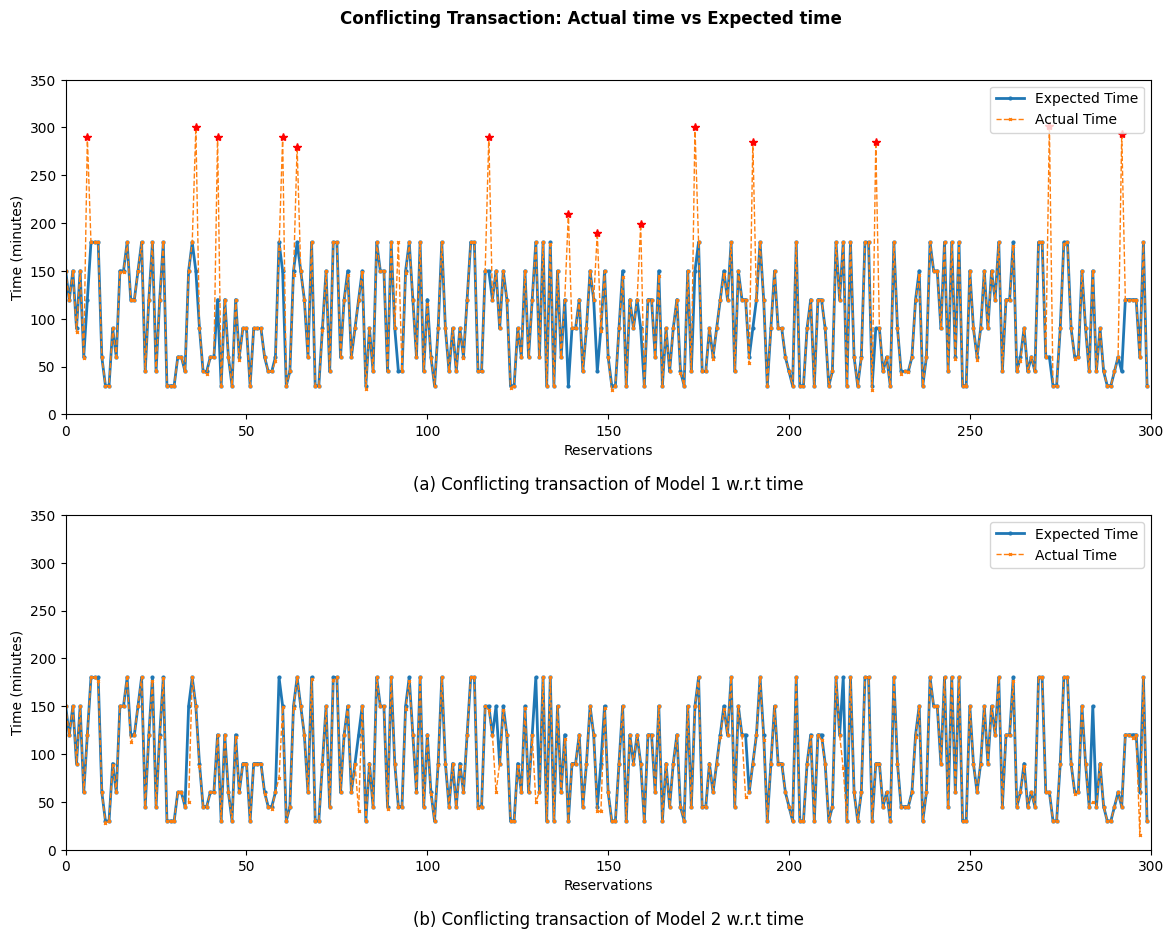

In [62]:
plt.figure(figsize=(14,10))
plt.suptitle('Conflicting Transaction: Actual time vs Expected time', fontweight= 'bold', x= 0.5, y=0.95)
plt.subplot(2,1,1)
plt.plot(expectedTimeMins, label='Expected Time', marker='o', markersize=2, linewidth=2, )
plt.plot(model1ActualTimeMins, label='Actual Time', marker='x', markersize=2, linewidth=1,linestyle='--')
for i, value in enumerate(model1ActualTimeMins):
    if value > 180:
        plt.plot(i, value, marker='*', markersize=6, color='red') 
plt.ylabel('Time (minutes)')
plt.xlabel('Reservations')
plt.ylim(0, 350)
plt.xlim(0,300)
plt.title('(a) Conflicting transaction of Model 1 w.r.t time', y=-0.25)
plt.legend(loc='upper right')

plt.subplot(2,1,2)
plt.plot(expectedTimeMins, label='Expected Time', marker='o', markersize=2, linewidth=2, )
plt.plot(model2ActualTimeMins, label='Actual Time', marker='x', markersize=2, linewidth=1,linestyle='--')
# for i, value in enumerate(model2ActualTimeMins):
#     if ( expectedTimeMins[i] - model2ActualTimeMins[i]) >10:
#         plt.plot(i, value, marker='*', markersize=8, color='green') 
plt.ylim(0, 350)
plt.xlim(0,300)
plt.ylabel('Time (minutes)')
plt.xlabel('Reservations')
plt.title('(b) Conflicting transaction of Model 2 w.r.t time', y=-0.25)
plt.subplots_adjust(hspace=0.3)
plt.legend(loc='upper right');

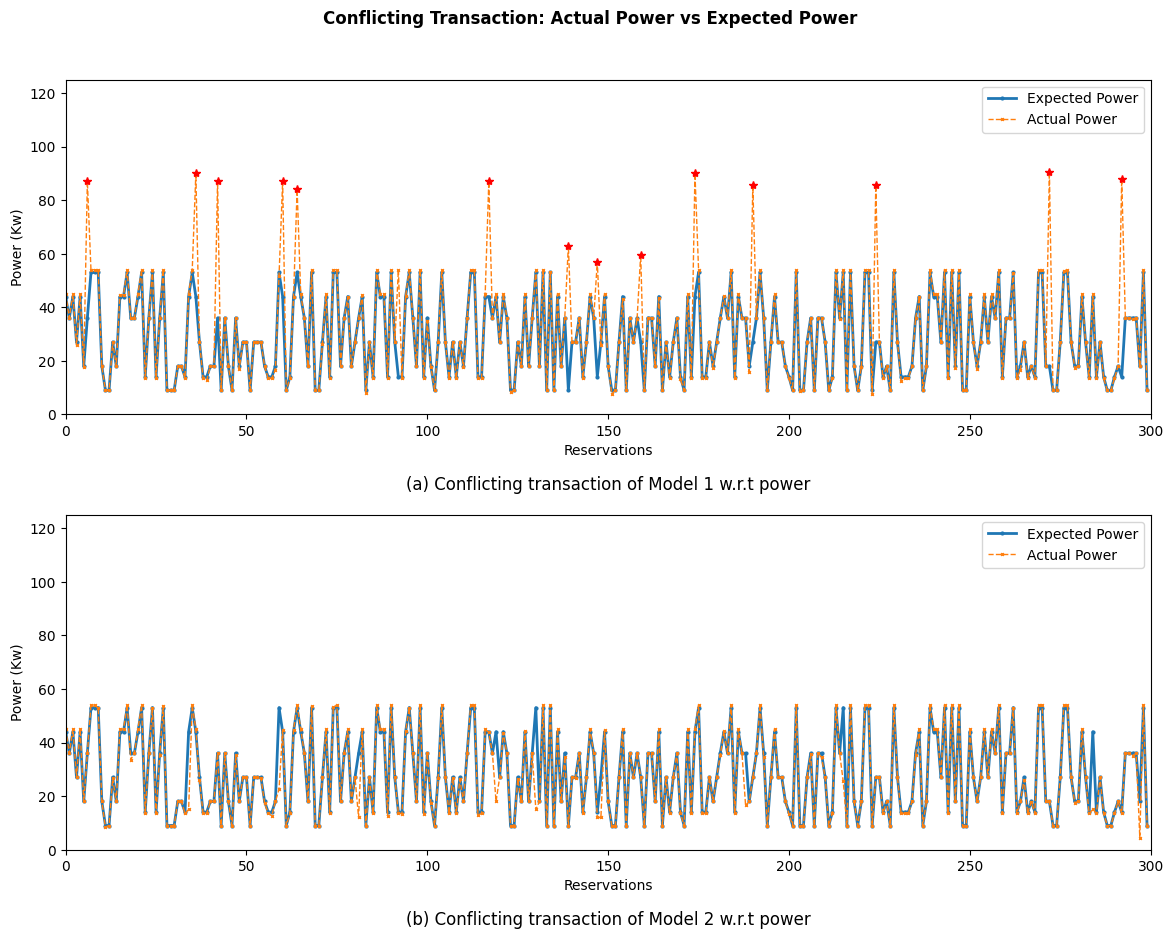

In [64]:
plt.figure(figsize=(14,10))
plt.suptitle('Conflicting Transaction: Actual Power vs Expected Power', fontweight='bold', x=0.5, y=0.95)
plt.subplot(2,1,1)
plt.plot(expectedPower, label='Expected Power', marker='o', markersize=2, linewidth=2, )
plt.plot(model1ActualPower, label='Actual Power', marker='x', markersize=2, linewidth=1,linestyle='--')
for i, value in enumerate(model1ActualPower):
    if value > 55:
        plt.plot(i, value, marker='*', markersize=6, color='red') 
plt.ylabel('Power (Kw)')
plt.xlabel('Reservations')

plt.ylim(0, 125)
plt.xlim(0,300)
plt.title('(a) Conflicting transaction of Model 1 w.r.t power', y= -0.25)
plt.legend(loc='upper right')

plt.subplot(2,1,2)
plt.plot(expectedPower, label='Expected Power', marker='o', markersize=2, linewidth=2, )
plt.plot(model2ActualPower, label='Actual Power', marker='x', markersize=2, linewidth=1,linestyle='--')
# for i, value in enumerate(model2ActualPower):
#     if ( expectedPower[i] - model2ActualPower[i]) >10:
#         plt.plot(i, value, marker='*', markersize=8, color='green') 
plt.ylim(0, 125)
plt.xlim(0,300)
plt.ylabel('Power (Kw)')
plt.xlabel('Reservations')
plt.title('(b) Conflicting transaction of Model 2 w.r.t power', y=-0.25)
plt.subplots_adjust(hspace=0.3)
plt.legend(loc='upper right');

In [12]:
set(expectedTimeMins)

{30, 45, 60, 90, 120, 150, 180}

In [13]:
tot30 =0
cnt30=0
cnt45=0
cnt60 =0
cnt90 = 0
cnt120 = 0
cnt150 = 0
cnt180=0
tot45=0
tot60=0
tot90=0
tot120=0
tot150=0
tot180=0

for i in range(300):
    if expectedTimeMins[i] ==30:
        if expectedTimeMins[i]< model1ActualTimeMins[i]:
            cnt30+=1
        tot30+=1    
    if expectedTimeMins[i] ==45:
        if expectedTimeMins[i]< model1ActualTimeMins[i]:
            cnt45+=1
        tot45+=1
    if expectedTimeMins[i] ==60:
        if expectedTimeMins[i]< model1ActualTimeMins[i]:
            cnt60+=1
        tot60+=1

    if expectedTimeMins[i] ==90:
        if expectedTimeMins[i]< model1ActualTimeMins[i]:
            cnt90+=1
        tot90+=1

    if expectedTimeMins[i] ==120:
        if expectedTimeMins[i]< model1ActualTimeMins[i]:
            cnt120+=1
        tot120+=1   
    if expectedTimeMins[i] ==150:
        if expectedTimeMins[i]< model1ActualTimeMins[i]:
            cnt150+=1
        tot150+=1  

    if expectedTimeMins[i] ==180:
        if expectedTimeMins[i]< model1ActualTimeMins[i]:
            cnt180+=1
        tot180+=1 

In [14]:
faultDeteRateM1 = {}
ep =0.01
faultDeteRateM1['30'] = (cnt30 + ep)/ tot30
faultDeteRateM1['45'] = (cnt45 + ep)/ tot45
faultDeteRateM1['60'] = (cnt60 + ep)/ tot60
faultDeteRateM1['90'] = (cnt90 + ep)/ tot90
faultDeteRateM1['120'] = (cnt120 + ep)/ tot120
faultDeteRateM1['150'] = (cnt150 + ep)/ tot150
faultDeteRateM1['180'] = (cnt180 + ep)/ tot180


In [15]:
faultDeteRateM1

{'30': 0.024047619047619047,
 '45': 0.07166666666666666,
 '60': 0.024634146341463416,
 '90': 0.06404255319148935,
 '120': 0.04568181818181818,
 '150': 0.10024999999999999,
 '180': 0.022954545454545453}

In [16]:
tot30 =0
cnt30=0
cnt45=0
cnt60 =0
cnt90 = 0
cnt120 = 0
cnt150 = 0
cnt180=0
tot45=0
tot60=0
tot90=0
tot120=0
tot150=0
tot180=0

for i in range(300):
    if i <=50:
        if expectedTimeMins[i]< model1ActualTimeMins[i]:
            cnt30+=1
        tot30+=1    
    if 50<i and i <=100:
        if expectedTimeMins[i]< model1ActualTimeMins[i]:
            cnt45+=1
        tot45+=1
    if 100<i and i <=150:
        if expectedTimeMins[i]< model1ActualTimeMins[i]:
            cnt60+=1
        tot60+=1

    if 150<i and  i <=200:
        if expectedTimeMins[i]< model1ActualTimeMins[i]:
            cnt90+=1
        tot90+=1

    if 200<i and i <=250:
        if expectedTimeMins[i]< model1ActualTimeMins[i]:
            cnt120+=1
        tot120+=1   
    if 250<i and  i <=300:
        if expectedTimeMins[i]< model1ActualTimeMins[i]:
            cnt150+=1
        tot150+=1  

  

In [17]:
faultDeteRateM2 = {}
ep =1
faultDeteRateM2['50'] = (cnt30 + ep)/ tot30
faultDeteRateM2['100'] = (cnt45 + ep)/ tot45
faultDeteRateM2['150'] = (cnt60 + ep)/ tot60
faultDeteRateM2['200'] = (cnt90 + ep)/ tot90
faultDeteRateM2['250'] = (cnt120 + ep)/ tot120
faultDeteRateM2['300'] = (cnt150 + ep)/ tot150


In [18]:
faultDeteRateM1 ={'50': 0.0784313725490196,
 '100': 0.08,
 '150': 0.08,
 '200': 0.08,
 '250': 0.04,
 '300': 0.061224489795918366}

In [19]:
faultDeteRateM2 = {'50': 0.0196078431372549,
 '100': 0.02,
 '150': 0.02,
 '200': 0.02,
 '250': 0.02,
 '300': 0.02040816326530612}

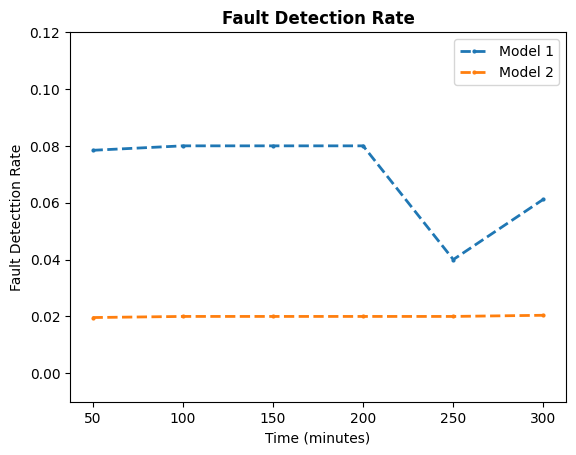

In [20]:

plt.plot(faultDeteRateM1.keys(),faultDeteRateM1.values(), label='Model 1', marker='o', markersize=2, linewidth=2, linestyle='--' )
plt.plot(faultDeteRateM2.keys(), faultDeteRateM2.values(), label='Model 2', marker='o', markersize=2, linewidth=2,linestyle='--')
plt.ylim(-0.01, 0.12)
plt.ylabel('Fault Detecttion Rate')
plt.xlabel('Time (minutes)')
plt.title('Fault Detection Rate', fontweight='bold')
plt.legend(loc='upper right');

In [21]:
cntM1 = 0
totM1 = 0
for i in range(300):
   
    if expectedTimeMins[i]< model1ActualTimeMins[i]:
        cntM1+=1
    totM1+=1 

cntM2 = 0
totM2 = 0
for i in range(300):
   
    if expectedTimeMins[i]< model2ActualTimeMins[i]:
        cntM2+=1
    totM2+=1 

In [22]:
ep = 1
faultrateM1 = (cntM1+ep)/totM1
faultrateM2 = (cntM2+ep)/totM2
print(faultrateM1, faultrateM2)

0.05333333333333334 0.0033333333333333335


In [23]:
faultrateM1

0.05333333333333334

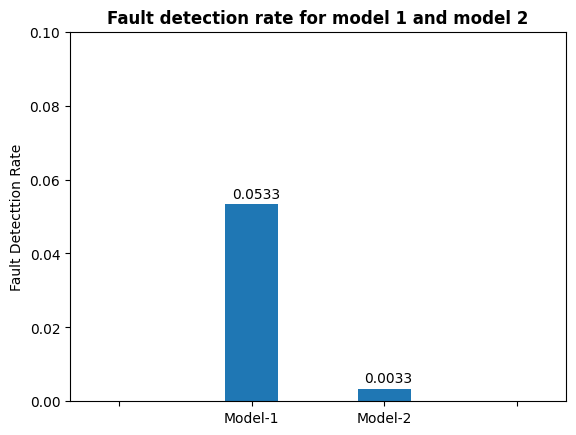

In [103]:
# plt.figure(figsize=(8,5))


plt.bar(['','Model-1', 'Model-2',' '] ,[0.0,faultrateM1, faultrateM2,0.0], width=0.4)
plt.ylim(0, 0.10)
plt.ylabel('Fault Detecttion Rate')
plt.text(0.85,0.055, round(faultrateM1,4) )
plt.text(1.85,0.005, round(faultrateM2,4) )
plt.title('Fault detection rate for model 1 and model 2', fontweight='bold');

In [25]:
cntM1

15